<a href="https://colab.research.google.com/github/GiammarcoBozzelli/green-patents/blob/main/messy_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Messy notebook - Elephant Group
Team members: Giammarco Bozzelli, Igor Dallemagne, Aleksandr Dubinin

In [ ]:
%%capture
!git clone https://github.com/GiammarcoBozzelli/green-patents.git
%cd green-patents
!pip install -r requirements.txt

In [ ]:
from Modules import *
import numpy as np
import pandas as pd

In [ ]:
merged_final = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/green-patents/main/data/final.csv')

# Imports

In [139]:
!pip install linearmodels Stargazer pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 10.1 MB/s eta 0:00:00


In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from IPython.display import display
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from stargazer.stargazer import Stargazer
import pycountry
from IPython.display import Image, display,HTML

In [6]:
#Import extreme weather events from EM-DAT
events = pd.read_excel("https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/public_emdat_custom_request_2023-12-12_686c6667-5546-4cc0-a4b0-6062eb8d9e93.xlsx")

In [7]:
#Import Patent
patents = pd.read_csv("https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/PATS_IPC_13122023144148777.csv")

In [8]:
#Import GDP per Cap
GDPCap =  pd.read_excel("https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/GDPperCAP_WB.xls")

In [9]:
#FDI from WB 266 coountries
FDI_WB = pd.read_csv("https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/API_BX.KLT.DINV.CD.WD_DS2_en_csv_v2_5995288(1).csv", header = 2)

In [10]:
#import climate worriness dataset (https://dataforgood.facebook.com/dfg/tools/climate-change-opinion-survey)
climate_worriness = pd.read_excel("https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/climate_change_opinion_survey_2022_aggregated(1).xlsx",sheet_name = "climate_worry")

In [11]:
#import Education tertiary enrolmnet %
education = pd.read_csv('https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/b449f249-9a23-4840-b2cf-45c78ad26ef9_Data.csv')

In [12]:
#import pop
population = pd.read_excel("https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/API_SP.POP.TOTL_DS.xls")

In [13]:
# final consumption ad % of GDP
consumption = pd.read_csv('https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/73da1b2c-1935-485e-af2c-b0b61b733993_Data.csv')

# Data Cleaning

### Final consumption % of GDP

In [14]:
consumption = consumption.drop(["Series Name", "Series Code"],axis=1)
consumption['Country Name'] = consumption["Country Name"].str.lower()

In [15]:
consumption.columns = consumption.columns.str.replace(r'\s*\[YR[0-9]+\]\s*', '', regex=True)

In [16]:
data = [['Country Name', 'Country Code', 'Year', 'consumption']]

for index, row in consumption.iterrows():
    country_name = row['Country Name']
    country_code = row['Country Code']
    for col in consumption.columns[2:]:
        year = int(col)
        secondary = row[col]
        data.append([country_name, country_code, year, secondary])

# Create a new dataframe with data restructuring
consumption = pd.DataFrame(data[1:], columns=data[0])
consumption.reset_index(drop=True, inplace=True)


In [17]:
consumption  = consumption.rename(columns={'Country Code':'ISO',"Country Name":'Country'})
consumption['ISO'] = consumption['ISO'].str.lower().astype('string')
consumption['Country'] = consumption['Country'].str.lower().astype('string')
consumption['consumption'] = consumption['consumption'].replace('..', pd.NA)
consumption['consumption'] = pd.to_numeric(consumption['consumption'])

In [18]:
consumption = consumption.dropna(subset='consumption')

In [19]:
consumption

,Country,ISO,Year,consumption
0,afghanistan,afg,1960,86.776852
1,afghanistan,afg,1961,87.044526
2,afghanistan,afg,1962,85.365850
3,afghanistan,afg,1963,93.491117
4,afghanistan,afg,1964,95.277767
...,...,...,...,...
13666,zimbabwe,zwe,2018,88.074018
13667,zimbabwe,zwe,2019,86.888296
13668,zimbabwe,zwe,2020,89.581158
13669,zimbabwe,zwe,2021,89.789589


### Patents

In [20]:
#Cleaning could add on the top
patents_new = patents[["Country", "Value", "Time","Technology domains & IPC", "LOCATION",'KINDPATENT']].rename(columns={"Value":"Patents number",'LOCATION':'ISO'})
patents_new = patents_new[(patents_new['Technology domains & IPC'] == "Environment") & (patents_new['KINDPATENT'] == 'PCT_A')]

patents_new = patents_new.drop(['Technology domains & IPC', 'KINDPATENT'], axis=1)

# Convert 'country' column to lowercase
patents_new['Country'] = patents_new['Country'].str.lower()
patents_new['ISO'] = patents_new['ISO'].str.lower()
patents_new = patents_new.rename(columns={"Time": "Year"})

patents_new

,Country,Patents number,Year,ISO
59036,belarus,0.0000,1977,blr
59037,belarus,0.0000,1978,blr
59038,belarus,0.0000,1979,blr
59039,belarus,0.0000,1980,blr
59040,belarus,0.0000,1981,blr
...,...,...,...,...
63566,united arab emirates,11.5000,2017,are
63567,united arab emirates,12.0000,2018,are
63568,united arab emirates,6.7500,2019,are
63569,united arab emirates,15.0000,2020,are


In [21]:
patents_new['Patents number'].describe()

count    4535.000000
mean      106.555929
std       564.395965
min         0.000000
25%         0.000000
50%         1.000000
75%        13.000000
max      7607.100000
Name: Patents number, dtype: float64

In [73]:
len(patents_new.Country.unique())

101

### Catastrophy

In [25]:
catastrophy = pd.read_excel('https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/public_emdat_custom_request_2023-12-12_686c6667-5546-4cc0-a4b0-6062eb8d9e93.xlsx')
catastrophy = catastrophy[["Country","ISO", "Disaster Type", 'Start Year','Total Deaths',"Total Affected", "Total Damage, Adjusted ('000 US$)"]]
catastrophy = catastrophy.rename(columns={'Start Year': 'Year', 'Country Code':'ISO'})
catastrophy['ISO'] = catastrophy['ISO'].str.lower().astype('string')
catastrophy['Country'] = catastrophy['Country'].str.lower().astype('string')
catastrophy['Disaster Type'] = catastrophy['Disaster Type'].str.lower().astype('string')
catakeep = ['drought', 'flood', 'extreme temperature', 'storm', 'wildfire', 'glacial lake outburst flood']
cata = catastrophy[catastrophy['Disaster Type'].isin(catakeep)]
cata.Country.unique()

,Country,ISO,Disaster Type,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,benin,ben,drought,1972,NaN,115000.0,NaN
1,cabo verde,cpv,drought,1972,NaN,NaN,NaN
2,gambia,gmb,drought,1971,NaN,150000.0,1446.0
3,guinea-bissau,gnb,drought,1972,NaN,NaN,NaN
4,morocco,mar,flood,1970,11.0,266444.0,226134.0
...,...,...,...,...,...,...,...
24381,honduras,hnd,drought,2023,NaN,10300.0,NaN
24382,spain,esp,drought,2023,NaN,NaN,NaN
24383,indonesia,idn,drought,2023,NaN,18750000.0,NaN
24384,uruguay,ury,drought,2023,NaN,409115.0,NaN


### FDI - Foreign Direct Investment, net inflows from WB


In [26]:
FDI_WB

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.506181e+08,-2.877586e+07,2.755127e+07,1.624636e+08,1.359212e+08,-7.522654e+07,1.610670e+08,1.335451e+08,2.481503e+08,NaN
1,Africa Eastern and Southern,AFE,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.768142e+10,2.877423e+10,1.666027e+10,1.010829e+10,1.358898e+10,1.486866e+10,1.285669e+10,5.279721e+10,1.807836e+10,NaN
2,Afghanistan,AFG,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.297526e+07,1.691466e+08,9.359132e+07,5.153390e+07,1.194351e+08,2.340455e+07,1.297015e+07,2.060098e+07,NaN,NaN
3,Africa Western and Central,AFW,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.659803e+10,1.564317e+10,1.393704e+10,1.766242e+10,1.549284e+10,1.245274e+10,1.075330e+10,1.735395e+10,1.258155e+10,NaN
4,Angola,AGO,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.657515e+09,1.002822e+10,-1.795176e+08,-7.397295e+09,-6.456076e+09,-4.098479e+09,-1.866468e+09,-4.355117e+09,-6.598653e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.998884e+08,3.433506e+08,2.437871e+08,2.868352e+08,3.185430e+08,2.850816e+08,3.946253e+08,5.009279e+08,8.114684e+08,NaN
262,"Yemen, Rep.",YEM,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.331047e+08,-1.544481e+07,-5.610000e+08,-2.698500e+08,-2.820983e+08,-3.709828e+08,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.791659e+09,1.521140e+09,2.215307e+09,2.058580e+09,5.569462e+09,5.116098e+09,3.153553e+09,4.065879e+10,9.194808e+09,NaN
264,Zambia,ZMB,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.507800e+09,1.582667e+09,6.628139e+08,1.107520e+09,4.084385e+08,5.479679e+08,2.452055e+08,-2.714361e+08,1.080941e+07,NaN


In [27]:
FDI_WB = FDI_WB.drop(["Indicator Name", "Indicator Code","Unnamed: 67"],axis=1)
FDI_WB['Country Name'] = FDI_WB["Country Name"].str.lower()

In [28]:
selected_columns = [FDI_WB.columns[0]] + [FDI_WB.columns[1]] + [col for col in FDI_WB.columns[2:] if int(col) > 1970]

FDI = FDI_WB[selected_columns]

In [29]:
data = [['Country Name', 'Country Code', 'Year', 'FDI']]

for index, row in FDI.iterrows():
    country_name = row['Country Name']
    country_code = row['Country Code']
    for col in FDI.columns[2:]:
        year = int(col)
        fdi_value = row[col]
        data.append([country_name, country_code, year, fdi_value])

# Create a new dataframe with data restructuring
fdi = pd.DataFrame(data[1:], columns=data[0])
fdi.reset_index(drop=True, inplace=True)


In [30]:
fdi = fdi.rename(columns={'Country Code': 'ISO', 'Country Name':'Country'})
fdi['ISO'] = fdi['ISO'].str.lower().astype('string')

In [31]:
fdi

,Country,ISO,Year,FDI
0,aruba,abw,1971,NaN
1,aruba,abw,1972,NaN
2,aruba,abw,1973,NaN
3,aruba,abw,1974,NaN
4,aruba,abw,1975,NaN
...,...,...,...,...
13827,zimbabwe,zwe,2018,7.178653e+08
13828,zimbabwe,zwe,2019,2.495000e+08
13829,zimbabwe,zwe,2020,1.503600e+08
13830,zimbabwe,zwe,2021,2.500000e+08


### Cleaning the Government index dataset [not used at the end]


In [ ]:
government = government.drop(["Series Code"],axis=1)
government.rename(columns={col: col.split()[0] for col in government.columns if '[YR' in col}, inplace=True)


In [ ]:
reframed_government = pd.melt(
    government,
    id_vars=['Country Name', 'Country Code', 'Series Name'],
    var_name='Year',
    value_name='Value'
)

reframed_government = reframed_government.rename(columns={'Country Code':'ISO', 'Country Name':'Country'})
reframed_government = reframed_government[reframed_government['Series Name'].str.contains('control of corruption: estimate', case=False) & reframed_government['Series Name'].notna()]
reframed_government = reframed_government[reframed_government['Series Name'] != '<NA>']
reframed_government['ISO'] = reframed_government['ISO'].str.lower().astype('string')
reframed_government['Country'] = reframed_government['Country'].str.lower().astype('string')
reframed_government['Series Name'] = reframed_government['Series Name'].str.lower().astype('string')
reframed_government['Year'] = reframed_government['Year'].astype('int')
reframed_government['Value'] = pd.to_numeric(reframed_government['Value'],errors = 'coerce')


In [ ]:
reframed_government

### Climate worriness

In [32]:
climate_worriness = climate_worriness.transpose()
climate_worriness.columns = climate_worriness.iloc[0]
climate_worriness = climate_worriness.iloc[1:]

In [33]:
climate_worriness

climate_worry,Very worried,Somewhat worried,Not very worried,Not at all worried,Refused,(Unweighted Base)
Albania,41.842366,39.837751,9.840718,6.034527,2.444638,329.0
Algeria,34.574832,31.352787,14.549988,16.932467,2.589926,1066.0
Angola,54.723818,19.441686,14.933694,7.291281,3.609521,727.0
Argentina,50.378295,34.216395,9.100259,5.244613,1.060438,1257.0
Armenia,35.560722,37.144316,16.890086,10.260444,0.144432,306.0
...,...,...,...,...,...,...
Uruguay,50.090761,35.070081,9.097307,4.684442,1.057408,580.0
Uzbekistan,37.386223,41.172126,14.324256,6.493777,0.623618,710.0
Vietnam,40.00403,45.190011,9.954357,3.237201,1.614402,1096.0
Yemen,7.325754,24.378207,26.250941,40.861359,1.183739,731.0


In [34]:
climate_worriness['Country'] = climate_worriness.index
climate_worriness['Country'] = climate_worriness['Country'].str.lower()
climate_worriness['Worriness'] = climate_worriness['Very worried'] + climate_worriness['Somewhat worried']
climate_worriness.reset_index(drop= True, inplace=True)
climate_worriness = climate_worriness[['Country',"Worriness"]]
climate_worriness.rename_axis('', axis=1, inplace=True)
climate_worriness.loc[:, 'Country'] = climate_worriness['Country'].astype('string')
climate_worriness.loc[:, 'Worriness'] = climate_worriness['Worriness'].astype('float64')

<ipython-input-34-078ac9b07734>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_worriness.loc[:, 'Country'] = climate_worriness['Country'].astype('string')
<ipython-input-34-078ac9b07734>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  climate_worriness.loc[:, 'Country'] = climate_worriness['Country'].astype('string')
<ipython-input-34-078ac9b07734>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [35]:
def get_iso3(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except AttributeError:
        return None


In [36]:
climate_worriness['ISO'] = climate_worriness['Country'].apply(get_iso3).str.lower()
climate_worriness['ISO'] = climate_worriness['ISO'].astype('string')

NameError: ignored

In [ ]:
climate_worriness

### Education

In [37]:
education = education.drop(["Series Name", "Series Code"],axis=1)
education['Country Name'] = education["Country Name"].str.lower()

In [38]:
education.columns = education.columns.str.replace(r'\s*\[YR[0-9]+\]\s*', '', regex=True)

In [39]:
data = [['Country Name', 'Country Code', 'Year', 'Tertiary']]

for index, row in education.iterrows():
    country_name = row['Country Name']
    country_code = row['Country Code']
    for col in education.columns[2:]:
        year = int(col)
        tertiary = row[col]
        data.append([country_name, country_code, year, tertiary])

# Create a new dataframe with data restructuring
education = pd.DataFrame(data[1:], columns=data[0])
education.reset_index(drop=True, inplace=True)


In [40]:
education = education.rename(columns={'Country Code':'ISO',"Country Name":'Country'})
education['ISO'] = education['ISO'].str.lower().astype('string')
education['Tertiary'] = education['Tertiary'].replace('..', pd.NA)
education['Tertiary'] = pd.to_numeric(education['Tertiary'])
education['Country'] = education['Country'].astype('string')

In [41]:
education = education.dropna(subset=['Country','ISO'])

In [42]:
education

,Country,ISO,Year,Tertiary
0,afghanistan,afg,2022,NaN
1,afghanistan,afg,2021,NaN
2,afghanistan,afg,2020,10.85844
3,afghanistan,afg,2019,NaN
4,afghanistan,afg,2018,9.96379
...,...,...,...,...
16753,world,wld,1964,NaN
16754,world,wld,1963,NaN
16755,world,wld,1962,NaN
16756,world,wld,1961,NaN


##Population

In [43]:
#Cleaning Pop DS
population.columns = GDPCap.iloc[2]  #define the line 3 as name of the column
population = population.iloc[3:]

population

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
4,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
5,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
6,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
7,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
265,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
266,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
267,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [44]:
#Get rid of useless columns and convert in small letters
pop = population.drop(columns=['Indicator Name', 'Indicator Code'])
pop.rename(columns={'Country Name': 'Country',"Country Code":'ISO'}, inplace=True)
pop['ISO'] = pop['ISO'].str.lower()
pop['Country'] = pop['Country'].str.lower()

pop

2,Country,ISO,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,aruba,abw,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
4,africa eastern and southern,afe,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
5,afghanistan,afg,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
6,africa western and central,afw,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
7,angola,ago,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,kosovo,xkx,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
265,"yemen, rep.",yem,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
266,south africa,zaf,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
267,zambia,zmb,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [45]:
# Data Restructuration to have in one the years
data = [['Country','ISO', 'Year', 'Population']]

for index, row in pop.iterrows():
    pays = row['Country']
    iso = row['ISO']
    for col in pop.columns[2:]:
        annee = int(col)
        valeur = row[col]
        data.append([pays,iso, annee, valeur])

# Create new dataframe with data Restructuration
pop = pd.DataFrame(data[1:], columns=data[0])

# reset index to columns
pop.reset_index(drop=True, inplace=True)

In [46]:
pop['ISO'] = pop['ISO'].astype('string')
pop['Country'] = pop['Country'].astype('string')

In [47]:
pop

,Country,ISO,Year,Population
0,aruba,abw,1960,54608.0
1,aruba,abw,1961,55811.0
2,aruba,abw,1962,56682.0
3,aruba,abw,1963,57475.0
4,aruba,abw,1964,58178.0
...,...,...,...,...
16753,zimbabwe,zwe,2018,15052184.0
16754,zimbabwe,zwe,2019,15354608.0
16755,zimbabwe,zwe,2020,15669666.0
16756,zimbabwe,zwe,2021,15993524.0


##GDP

In [48]:
#Cleaning GDP DS
GDPCap.columns = GDPCap.iloc[2]  #define the line 3 as name of the column
GDPC = GDPCap.iloc[3:]

GDPC

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
4,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
5,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
6,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
7,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562199,3902.529820,3520.780421,3759.471040,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
265,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
266,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
267,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831747,1137.344395,1487.907764


In [49]:
#Get rid of useless columns and convert in small letters
GDPC = GDPC.drop(columns=['Indicator Name', 'Indicator Code'])
GDPC = GDPC.rename(columns={'Country Name': 'Country','Country Code':'ISO'})
GDPC['Country'] = GDPC['Country'].str.lower()

GDPC

2,Country,ISO,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
4,africa eastern and southern,AFE,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,210.149894,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
5,afghanistan,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
6,africa western and central,AFW,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,143.601581,128.049650,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
7,angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562199,3902.529820,3520.780421,3759.471040,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
265,"yemen, rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
266,south africa,ZAF,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
267,zambia,ZMB,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831747,1137.344395,1487.907764


In [50]:
# Data Restructuration to have in one the years
data = [['Country','ISO', 'Year', 'GDP']]

for index, row in GDPC.iterrows():
    pays = row['Country']
    iso = row['ISO']
    for col in GDPC.columns[2:]:
        annee = int(col)
        valeur = row[col]
        data.append([pays,iso, annee, valeur])


# Create new dataframe with data Restructuration
gdp = pd.DataFrame(data[1:], columns=data[0])
gdp['ISO'] = gdp['ISO'].str.lower()
# reset index to columns
gdp.reset_index(drop=True, inplace=True)

# Check the modified dataframe

gdp

,Country,ISO,Year,GDP
0,aruba,abw,1960,NaN
1,aruba,abw,1961,NaN
2,aruba,abw,1962,NaN
3,aruba,abw,1963,NaN
4,aruba,abw,1964,NaN
...,...,...,...,...
16753,zimbabwe,zwe,2018,2269.177012
16754,zimbabwe,zwe,2019,1421.868596
16755,zimbabwe,zwe,2020,1372.696674
16756,zimbabwe,zwe,2021,1773.920411


In [51]:
gdp['ISO'] = gdp['ISO'].astype('string')
gdp['Country'] = gdp['Country'].astype('string')

In [52]:
gdp

,Country,ISO,Year,GDP
0,aruba,abw,1960,NaN
1,aruba,abw,1961,NaN
2,aruba,abw,1962,NaN
3,aruba,abw,1963,NaN
4,aruba,abw,1964,NaN
...,...,...,...,...
16753,zimbabwe,zwe,2018,2269.177012
16754,zimbabwe,zwe,2019,1421.868596
16755,zimbabwe,zwe,2020,1372.696674
16756,zimbabwe,zwe,2021,1773.920411


# Merging

In [58]:
def merge_datasets(df1, df2):
    df2 = df2.rename(columns={'Country': 'Country_y'})
    merged_df = pd.merge(df1, df2, on=['ISO', 'Year'], how='left')
    merged_df = merged_df.drop(['Country_y'], axis=1)

    return merged_df

In [96]:
merged_sum = merge_datasets(patents_new, catastrophy)

In [97]:
merged_final = merge_datasets(merged_sum,education)

In [98]:
merged_final = merge_datasets(merged_final,gdp)

In [99]:
merged_final = merge_datasets(merged_final,pop)

In [100]:
merged_final = merge_datasets(merged_final,fdi)

In [101]:
merged_final = merge_datasets(merged_final,consumption)

In [102]:
merged_final = merged_final.rename(columns={'Patents number':'patents_number','Total Affected':'total_affected','Total Damage, Adjusted (\'000 US$)':'total_damage'})

In [103]:
len(merged_final.Country.unique())

101

#Dif in Dif

##catastrophy

In [104]:
#Vue catastrophy
catakeep = ['drought', 'flood', 'extreme temperature', 'storm', 'wildfire', 'glacial lake outburst flood']
cata = catastrophy[catastrophy['Disaster Type'].isin(catakeep)]
cata

,Country,ISO,Disaster Type,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,benin,ben,drought,1972,NaN,115000.0,NaN
1,cabo verde,cpv,drought,1972,NaN,NaN,NaN
2,gambia,gmb,drought,1971,NaN,150000.0,1446.0
3,guinea-bissau,gnb,drought,1972,NaN,NaN,NaN
4,morocco,mar,flood,1970,11.0,266444.0,226134.0
...,...,...,...,...,...,...,...
24381,honduras,hnd,drought,2023,NaN,10300.0,NaN
24382,spain,esp,drought,2023,NaN,NaN,NaN
24383,indonesia,idn,drought,2023,NaN,18750000.0,NaN
24384,uruguay,ury,drought,2023,NaN,409115.0,NaN


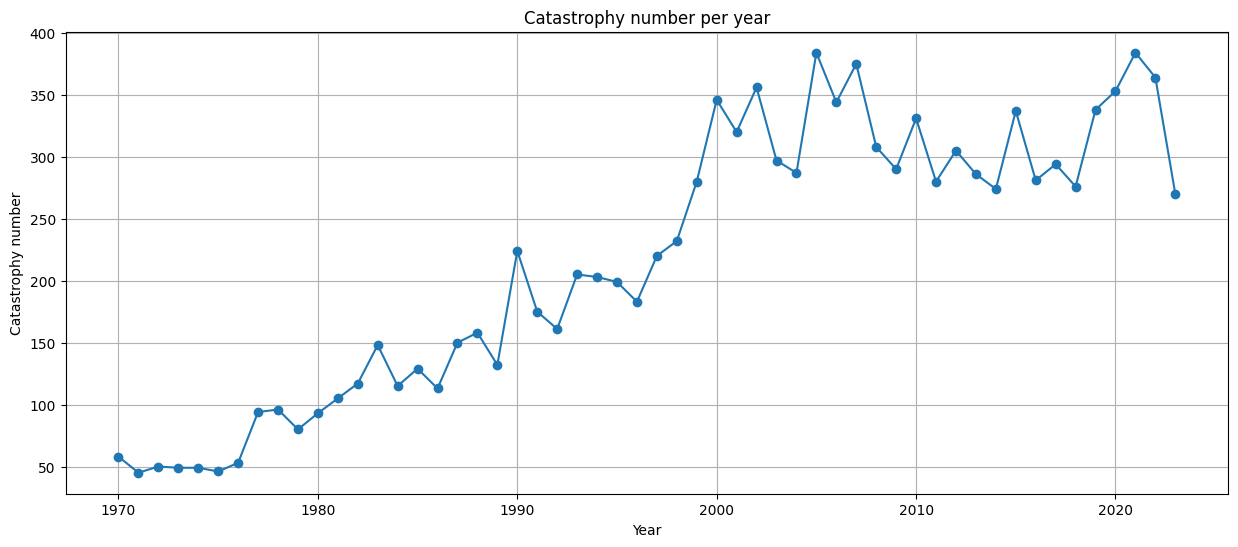

In [106]:
#visualise the global trend on number
catastrophes_per_year = cata['Year'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
plt.plot(catastrophes_per_year.index, catastrophes_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Catastrophy number')
plt.title('Catastrophy number per year')
plt.grid(True)
plt.show()

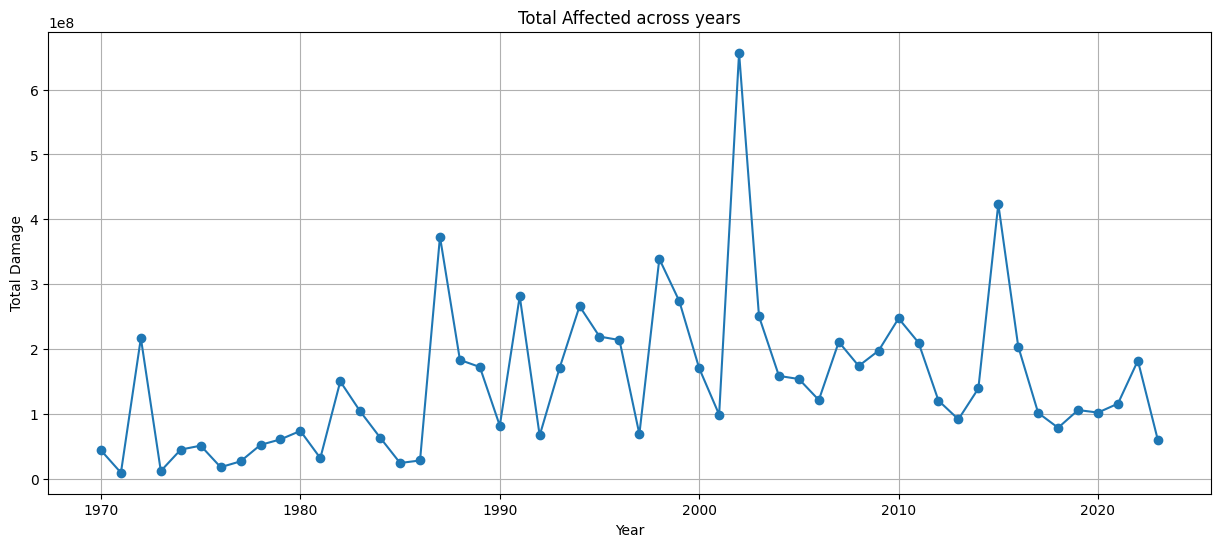

In [107]:
#visualise the global trend on affected
damage_per_year = cata.groupby('Year')["Total Affected"].sum()

plt.figure(figsize=(15, 6))
plt.plot(damage_per_year.index, damage_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Damage')
plt.title('Total Affected across years')
plt.grid(True)
plt.show()

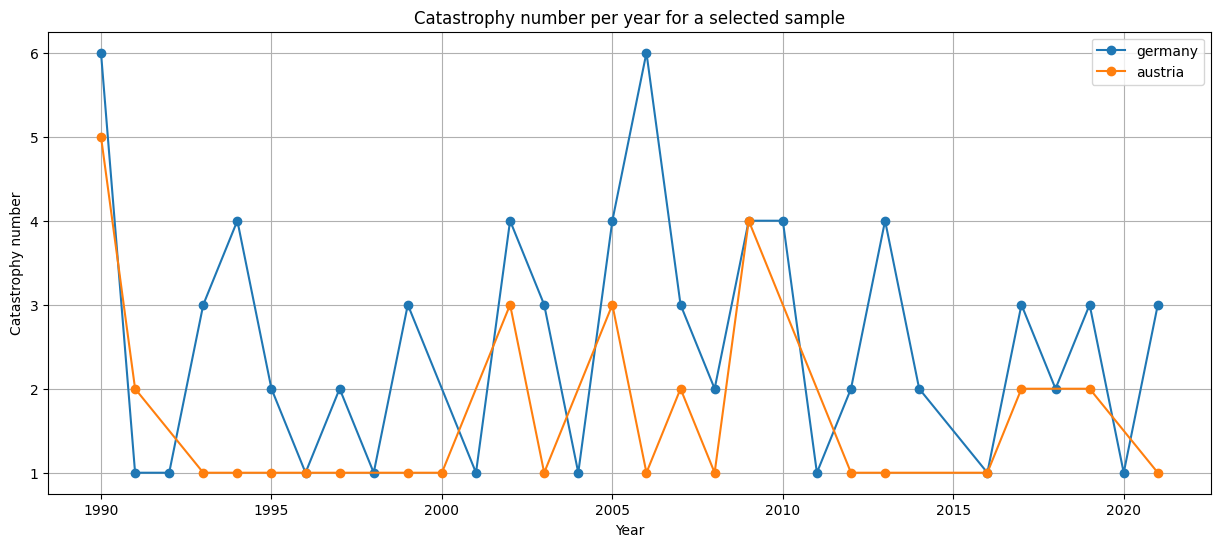

In [108]:
#visualize for Gemrany and Austria
sample = ['germany', 'austria']

plt.figure(figsize=(15, 6))
for pays in sample:
    data_selected = cata[(cata['Country'] == pays) & (cata['Year'].between(1990, 2021))]
    catastrophes_per_year = data_selected['Year'].value_counts().sort_index()
    plt.plot(catastrophes_per_year.index, catastrophes_per_year.values, marker='o', linestyle='-', label=pays)

plt.xlabel('Year')
plt.ylabel('Catastrophy number')
plt.title('Catastrophy number per year for a selected sample')
plt.legend()
plt.grid(True)
plt.show()

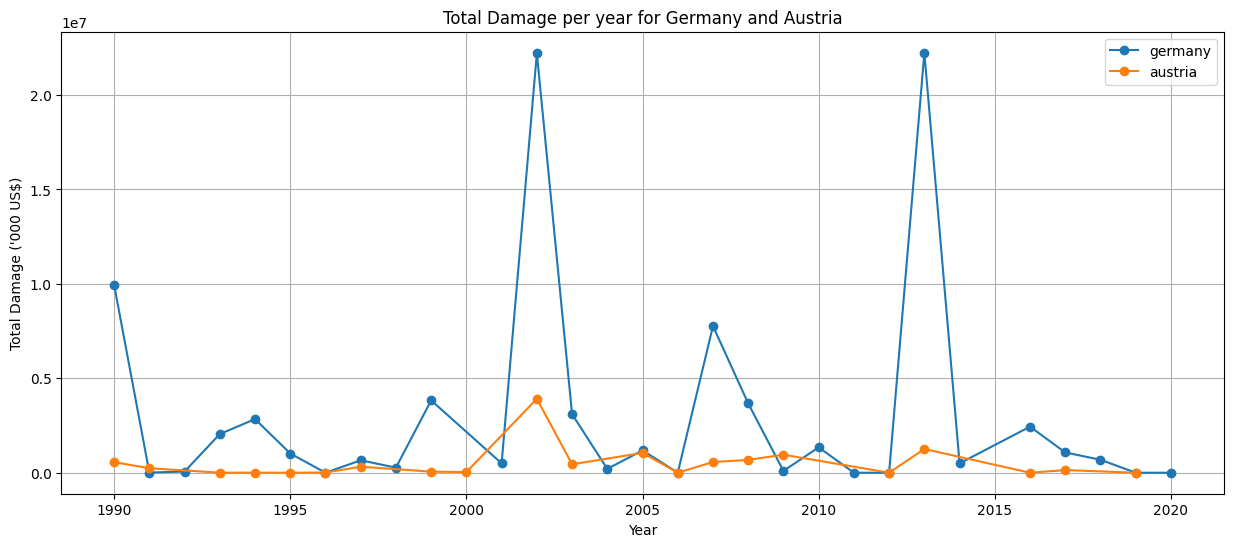

In [109]:
#visualize for Gemrany and Austria
sample = ['germany', 'austria']

plt.figure(figsize=(15, 6))
for country in sample:
    data_selected = cata[(cata['Country'] == country) & (cata['Year'].between(1990, 2020))]
    damage_per_year = data_selected.groupby('Year')['Total Damage, Adjusted (\'000 US$)'].sum()
    plt.plot(damage_per_year.index, damage_per_year.values, marker='o', linestyle='-', label=country)

plt.xlabel('Year')
plt.ylabel('Total Damage (\'000 US$)')
plt.title('Total Damage per year for Germany and Austria')
plt.legend()
plt.grid(True)
plt.show()

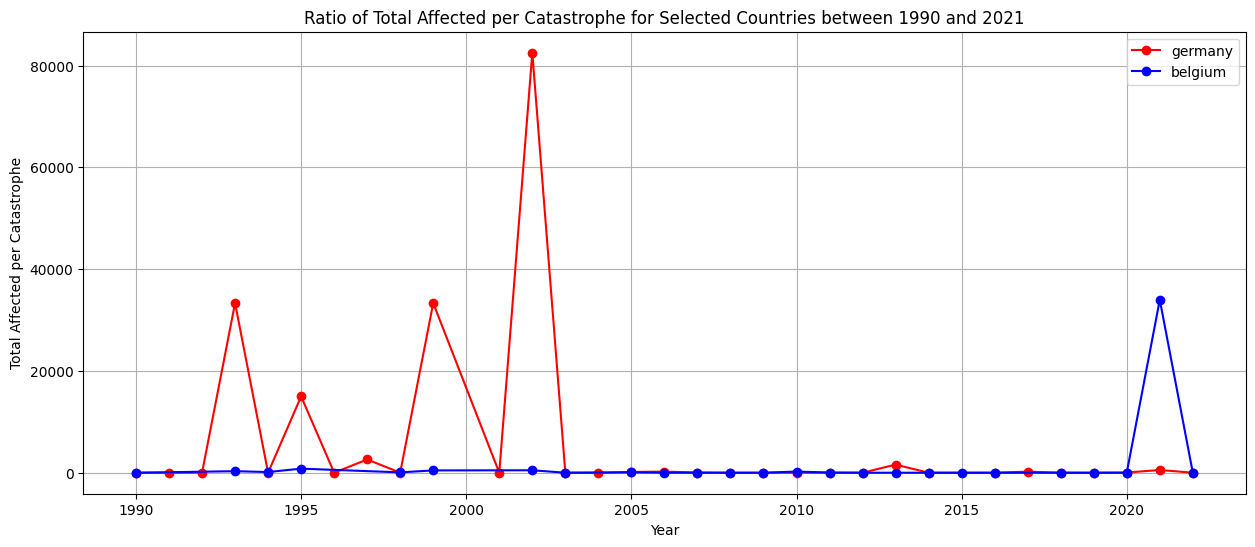

In [110]:
def ratioger_bel():
    sample = ['germany', 'belgium']

    plt.figure(figsize=(15, 6))
    for pays in sample:
        data_selected = cata[(cata['Country'] == pays) & (cata['Year'].between(1990, 2022))]
        catastrophes_per_year = data_selected['Year'].value_counts().sort_index()
        damage_per_year = data_selected.groupby('Year')["Total Affected"].sum().fillna(0)

        ratio = damage_per_year / catastrophes_per_year

        if pays == 'germany':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='red')
        elif pays == 'belgium':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='blue')

    plt.xlabel('Year')
    plt.ylabel('Total Affected per Catastrophe')
    plt.title('Ratio of Total Affected per Catastrophe for Selected Countries between 1990 and 2021')
    plt.legend()
    plt.grid(True)
    plt.show()

ratioger_bel()

##Patents

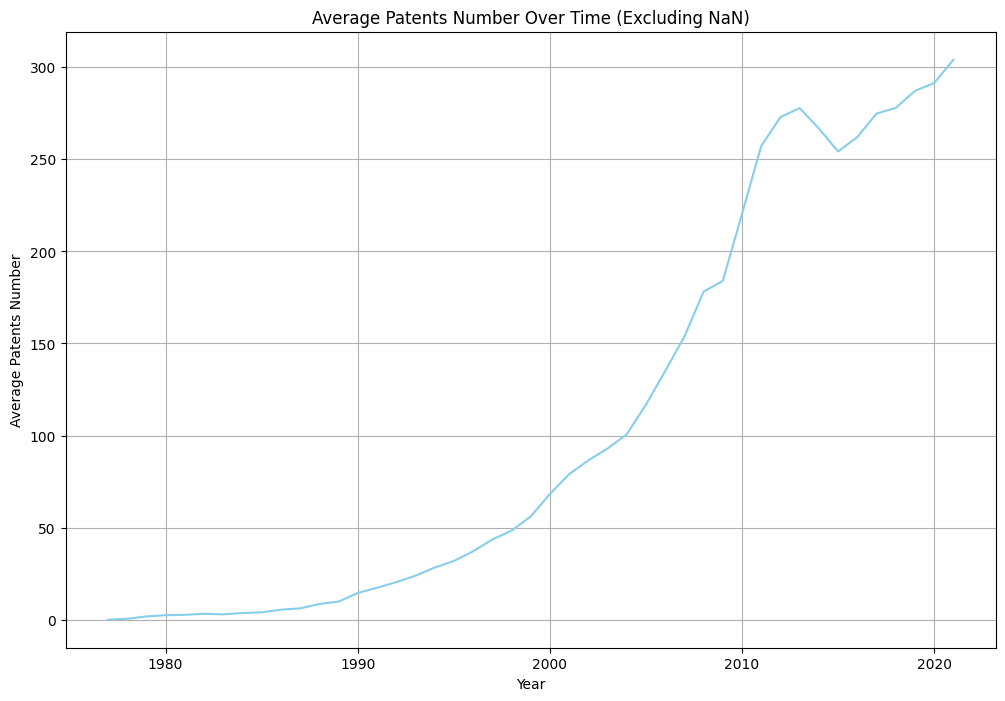

In [111]:
avg_patents_by_year = patents_new.groupby('Year')['Patents number'].mean().reset_index().dropna()

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot line chart
plt.plot(avg_patents_by_year['Year'], avg_patents_by_year['Patents number'], linestyle='-', color='skyblue')

plt.title('Average Patents Number Over Time (Excluding NaN)')
plt.xlabel('Year')
plt.ylabel('Average Patents Number')
plt.grid(True)  # Add grid for better readability
plt.show()

In [112]:
#Merge with gdp and pop for "per capita"
ds = pd.merge(patents_new, gdp, on=['ISO', 'Year'], how='inner')
ds = pd.merge(ds, pop, on=['ISO', 'Year'], how='inner')
ds['Patent per Capita'] = ds['Patents number'] / ds['Population']
ds = ds.drop('Country_y', axis=1)
ds.drop(ds.columns[5], axis=1, inplace=True)
ds.rename(columns={'Country_x': 'Country'}, inplace=True)
ds

,Country,Patents number,Year,ISO,GDP,Population,Patent per Capita
0,belarus,0.0000,1977,blr,NaN,9463000.0,0.000000e+00
1,belarus,0.0000,1978,blr,NaN,9525000.0,0.000000e+00
2,belarus,0.0000,1979,blr,NaN,9584000.0,0.000000e+00
3,belarus,0.0000,1980,blr,NaN,9643000.0,0.000000e+00
4,belarus,0.0000,1981,blr,NaN,9710000.0,0.000000e+00
...,...,...,...,...,...,...,...
4440,united arab emirates,11.5000,2017,are,43063.967479,9068296.0,1.268154e-06
4441,united arab emirates,12.0000,2018,are,46722.268719,9140169.0,1.312886e-06
4442,united arab emirates,6.7500,2019,are,45376.170839,9211657.0,7.327672e-07
4443,united arab emirates,15.0000,2020,are,37629.174168,9287289.0,1.615111e-06


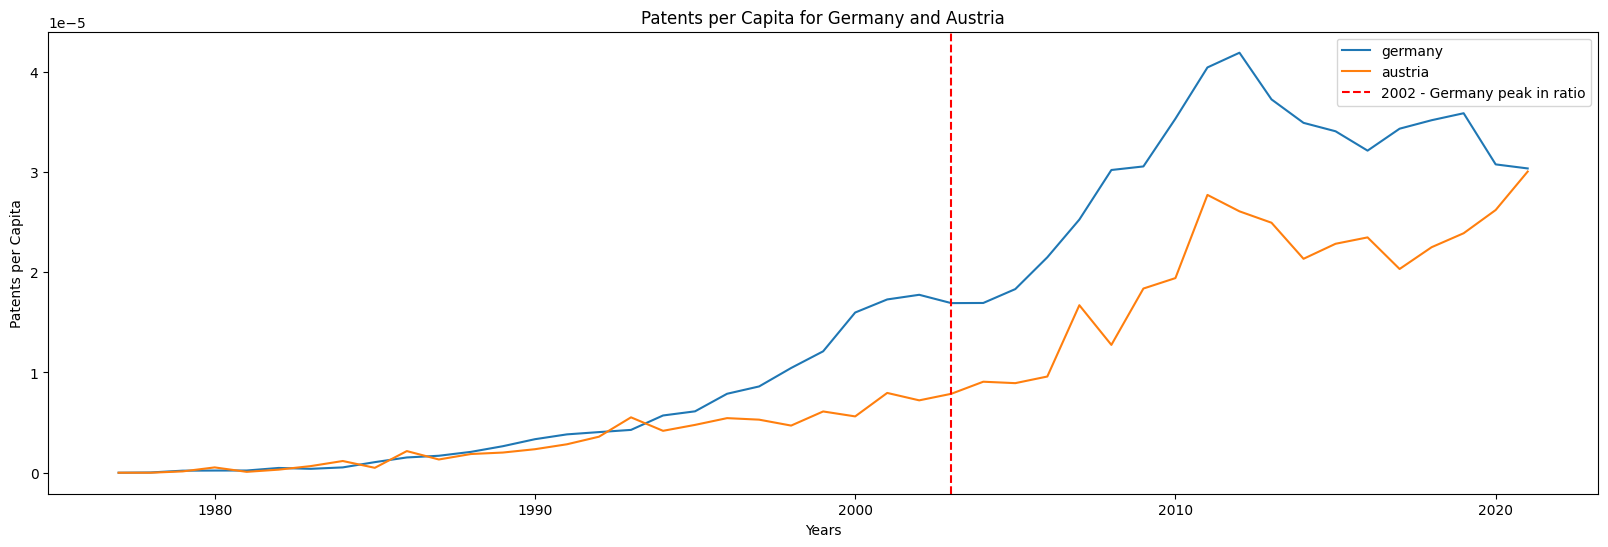

In [113]:
#compare Germany and Austria
plt.figure(figsize=(20, 6))

sample = ['germany', 'austria']

for pays in sample:
    pays_data = ds[ds['Country'] == pays].sort_values('Year')
    plt.plot(pays_data['Year'], pays_data['Patent per Capita'], label=pays)

plt.axvline(x=2003, linestyle='--', color='red', label='2002 - Germany peak in ratio')
plt.xlabel('Years')
plt.ylabel('Patents per Capita')
plt.title('Patents per Capita for Germany and Austria')
plt.legend()
plt.show()

##Regression

###Developped Counrty

In [114]:
#merge dataset for before and after the peak for germany and austria
dataset = pd.merge(ds, cata, on=['ISO', 'Year'], how='inner')
dataset = dataset.drop('Country_y', axis=1)
dataset.rename(columns={'Country_x': 'Country'}, inplace=True)

#create specific dataset with dummy
dataset_germany = dataset[dataset['Country'] == 'germany'].copy()
dataset_germany['after chock'] = (dataset_germany['Year'] > 2002).astype(int)
dataset_belgium = dataset[dataset['Country'] == 'belgium'].copy()
dataset_belgium['after chock'] = (dataset_belgium['Year'] > 2002).astype(int)
ger_bel = pd.concat([dataset_germany, dataset_belgium], ignore_index=True)
ger_bel['is Germany'] = (ger_bel['Country'] == 'germany').astype(int)
ger_bel

,Country,Patents number,Year,ISO,GDP,Population,Patent per Capita,Disaster Type,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",after chock,is Germany
0,germany,265.5333,1990,deu,22303.961327,79433029.0,0.000003,storm,8.0,NaN,2687818.0,0,1
1,germany,265.5333,1990,deu,22303.961327,79433029.0,0.000003,storm,7.0,NaN,1343909.0,0,1
2,germany,265.5333,1990,deu,22303.961327,79433029.0,0.000003,storm,NaN,NaN,134391.0,0,1
3,germany,265.5333,1990,deu,22303.961327,79433029.0,0.000003,storm,10.0,NaN,403173.0,0,1
4,germany,265.5333,1990,deu,22303.961327,79433029.0,0.000003,storm,15.0,NaN,2687818.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,belgium,150.1714,2020,bel,45517.903818,11538604.0,0.000013,storm,NaN,NaN,NaN,1,0
127,belgium,150.1714,2020,bel,45517.903818,11538604.0,0.000013,extreme temperature,1687.0,NaN,NaN,1,0
128,belgium,149.7833,2021,bel,51268.388037,11592952.0,0.000013,flood,39.0,101950.0,2160056.0,1,0
129,belgium,149.7833,2021,bel,51268.388037,11592952.0,0.000013,storm,NaN,NaN,NaN,1,0


In [115]:
#computation with patent per capita
ger_bel['After Chock Gemrany'] = ger_bel['is Germany'] * ger_bel['after chock']

model = sm.OLS(ger_bel['Patent per Capita'],
               sm.add_constant(ger_bel[['is Germany', 'after chock', 'After Chock Gemrany']]))

results = model.fit(cov_type='HC1')

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Patent per Capita   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     159.7
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           6.46e-43
Time:                        13:42:40   Log-Likelihood:                 1402.3
No. Observations:                 131   AIC:                            -2797.
Df Residuals:                     127   BIC:                            -2785.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.324e-06   6

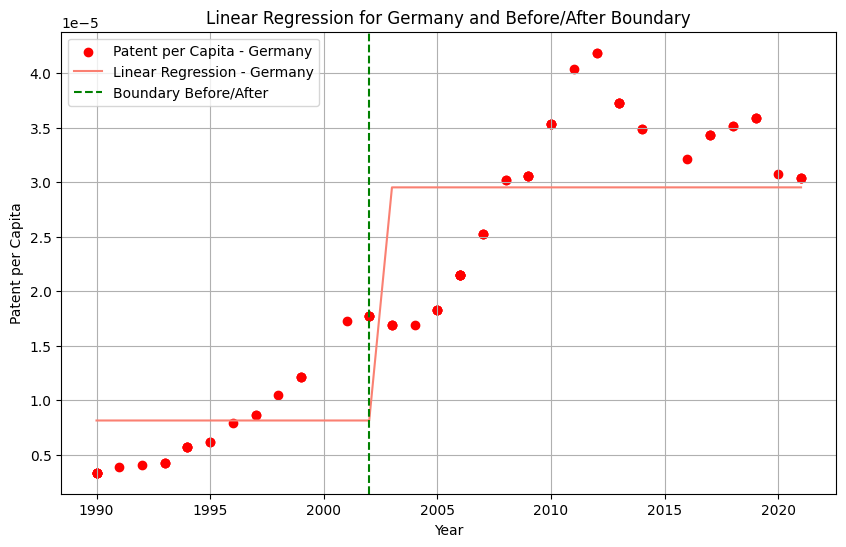

In [118]:
#Regression shift for germany
germany_data = ger_bel[ger_bel['is Germany'] == 1]

model_germany = sm.OLS(germany_data['Patent per Capita'],
                        sm.add_constant(germany_data[['after chock', 'After Chock Gemrany']]))

results_germany = model_germany.fit()

predictions_germany = results_germany.predict()

plt.figure(figsize=(10, 6))

#Add point cloud and regression
plt.scatter(germany_data['Year'], germany_data['Patent per Capita'], label='Patent per Capita - Germany', color='red')
plt.plot(germany_data['Year'], predictions_germany, label='Linear Regression - Germany', color='salmon')

#put the shift line
plt.axvline(x=2002, color='green', linestyle='--', label='Boundary Before/After')

plt.xlabel('Year')
plt.ylabel('Patent per Capita')
plt.title('Linear Regression for Germany and Before/After Boundary')
plt.legend()
plt.grid(True)
plt.show()

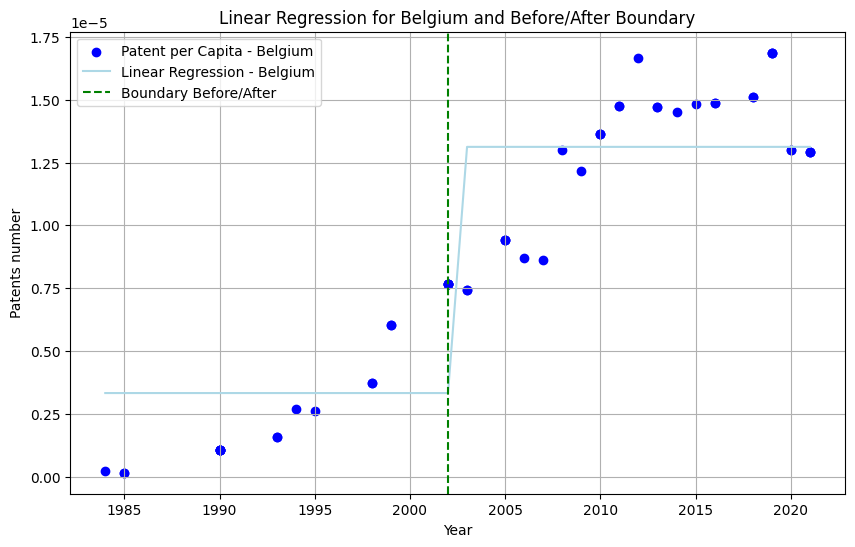

In [119]:
#regression for Austria
belgium_data = ger_bel[ger_bel['is Germany'] == 0]

model_belgium = sm.OLS(belgium_data['Patent per Capita'],
                        sm.add_constant(belgium_data[['after chock', 'After Chock Gemrany']]))

results_belgium = model_belgium.fit()

predictions_belgium = results_belgium.predict()

plt.figure(figsize=(10, 6))

#Add point cloud and regression
plt.scatter(belgium_data['Year'], belgium_data['Patent per Capita'], label='Patent per Capita - Belgium', color='blue')
plt.plot(belgium_data['Year'], predictions_belgium, label='Linear Regression - Belgium', color='lightblue')

#put the shift line
plt.axvline(x=2002, color='green', linestyle='--', label='Boundary Before/After')

plt.xlabel('Year')
plt.ylabel('Patents number')
plt.title('Linear Regression for Belgium and Before/After Boundary')
plt.legend()
plt.grid(True)
plt.show()

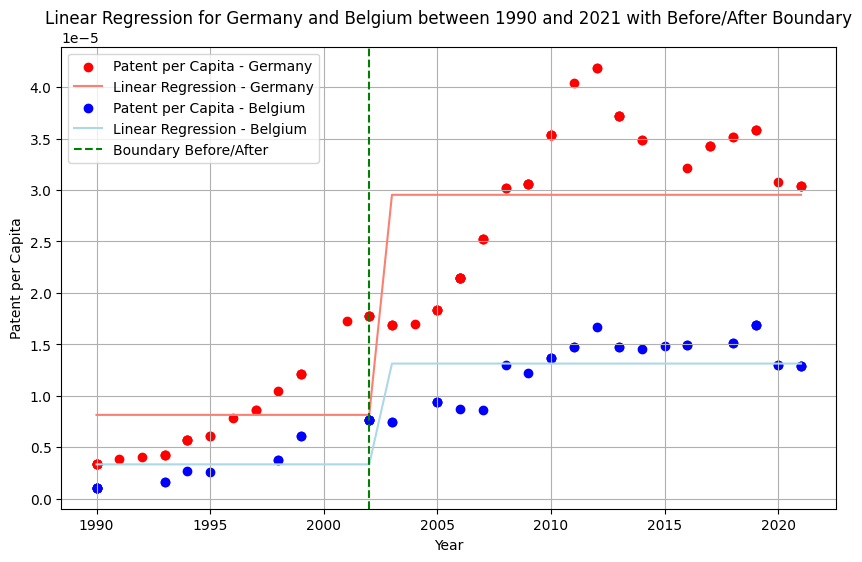

In [120]:
def difdifger_bel():
  plt.figure(figsize=(10, 6))

  ger_bel = pd.read_csv('https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/ger_bel.csv')

  germany_data = ger_bel[ger_bel['is Germany'] == 1]

  model_germany = sm.OLS(germany_data['Patent per Capita'],
                        sm.add_constant(germany_data[['after chock', 'After Chock Gemrany']]))

  results_germany = model_germany.fit()

  predictions_germany = results_germany.predict()


  belgium_data = ger_bel[ger_bel['is Germany'] == 0]

  model_belgium = sm.OLS(belgium_data['Patent per Capita'],
                          sm.add_constant(belgium_data[['after chock', 'After Chock Gemrany']]))

  results_belgium = model_belgium.fit()

  predictions_belgium = results_belgium.predict()


#Sort data from 1990 to 2021

  germany_data_filtered = germany_data[(germany_data['Year'] >= 1990) & (germany_data['Year'] <= 2021)]
  predictions_germany_filtered = predictions_germany[(germany_data['Year'] >= 1990) & (germany_data['Year'] <= 2021)]

  belgium_data_filtered = belgium_data[(belgium_data['Year'] >= 1990) & (belgium_data['Year'] <= 2021)]
  predictions_belgium_filtered = predictions_belgium[(belgium_data['Year'] >= 1990) & (belgium_data['Year'] <= 2021)]

#regression for germany
  plt.scatter(germany_data_filtered['Year'], germany_data_filtered['Patent per Capita'], label='Patent per Capita - Germany', color='red')
  plt.plot(germany_data_filtered['Year'], predictions_germany_filtered, label='Linear Regression - Germany', color='salmon')

#regression for austria
  plt.scatter(belgium_data_filtered['Year'], belgium_data_filtered['Patent per Capita'], label='Patent per Capita - Belgium', color='blue')
  plt.plot(belgium_data_filtered['Year'], predictions_belgium_filtered, label='Linear Regression - Belgium', color='lightblue')

#shift line
  plt.axvline(x=2002, color='green', linestyle='--', label='Boundary Before/After')

  plt.xlabel('Year')
  plt.ylabel('Patent per Capita')
  plt.title('Linear Regression for Germany and Belgium between 1990 and 2021 with Before/After Boundary')
  plt.legend()
  plt.grid(True)
  plt.show()

difdifger_bel()

In [121]:
cata = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/green-patents/main/data/cata.csv')

###Developping Country

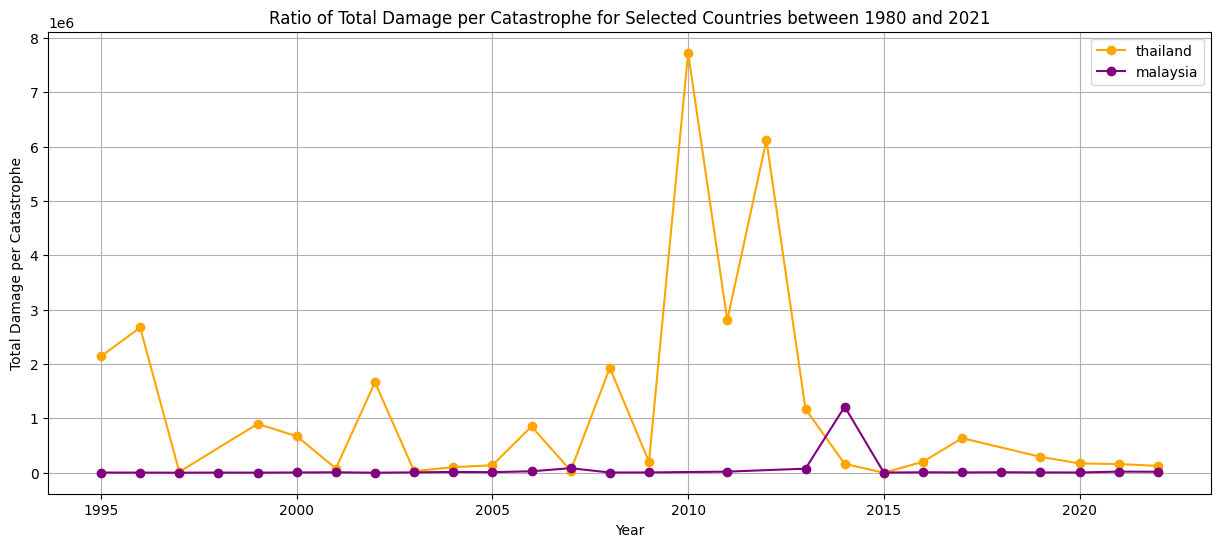

In [122]:
#Ratio
def ratiotha_mal():
  sample = ['thailand', 'malaysia']

  plt.figure(figsize=(15, 6))
  for pays in sample:
    data_selected = cata[(cata['Country'] == pays) & (cata['Year'].between(1995, 2022))]
    catastrophes_per_year = data_selected['Year'].value_counts().sort_index()
    damage_per_year = data_selected.groupby('Year')["Total Affected"].sum().fillna(0)

    ratio = damage_per_year / catastrophes_per_year

    if pays == 'malaysia':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='purple')
    elif pays == 'thailand':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='orange')

  #plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays)

  plt.xlabel('Year')
  plt.ylabel('Total Damage per Catastrophe')
  plt.title('Ratio of Total Damage per Catastrophe for Selected Countries between 1980 and 2021')
  plt.legend()
  plt.grid(True)
  plt.show()

ratiotha_mal()

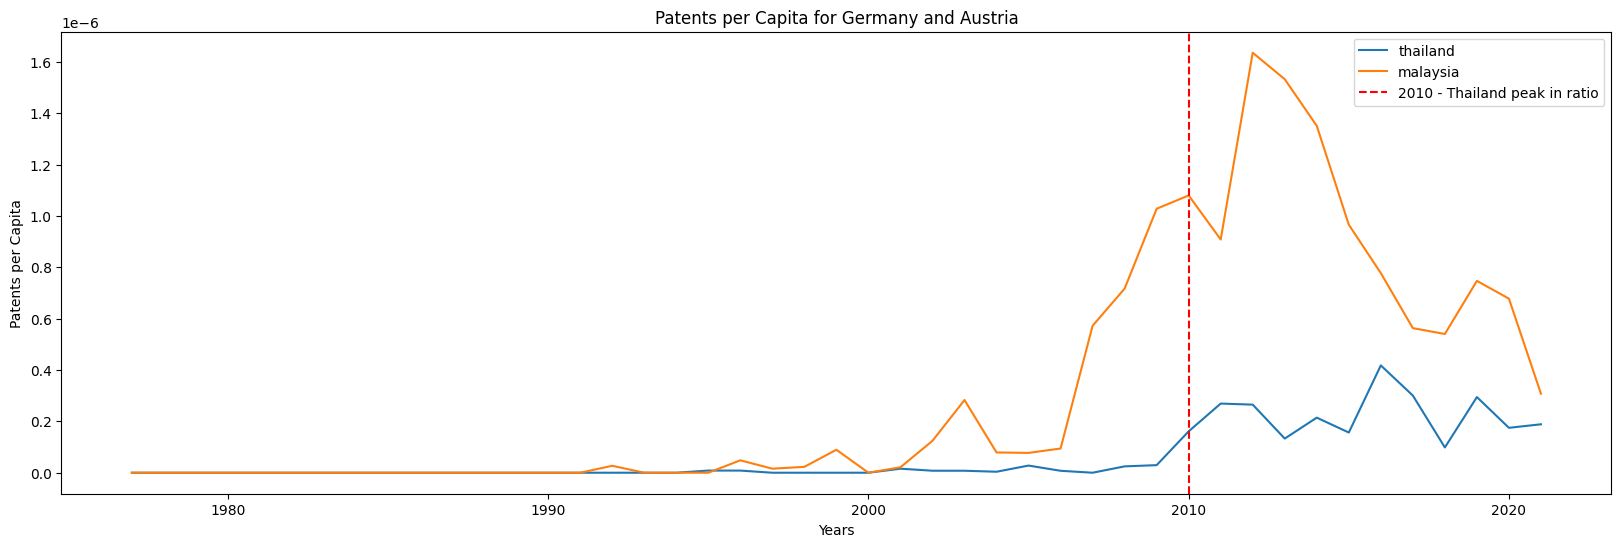

In [123]:
#compare Germany and Austria
plt.figure(figsize=(20, 6))

sample = ['thailand', 'malaysia']

for pays in sample:
    pays_data = ds[ds['Country'] == pays].sort_values('Year')
    plt.plot(pays_data['Year'], pays_data['Patent per Capita'], label=pays)

plt.axvline(x=2010, linestyle='--', color='red', label='2010 - Thailand peak in ratio')
plt.xlabel('Years')
plt.ylabel('Patents per Capita')
plt.title('Patents per Capita for Germany and Austria')
plt.legend()
plt.show()

In [124]:
#compare with Thailand and Malaysia
#create specific dataset with dummy
dataset_thailand = dataset[dataset['Country'] == 'thailand'].copy()
dataset_thailand['After Chock'] = (dataset_thailand['Year'] > 2010).astype(int)
dataset_malaysia = dataset[dataset['Country'] == 'malaysia'].copy()
dataset_malaysia['After Chock'] = (dataset_malaysia['Year'] > 2010).astype(int)
tha_mal = pd.concat([dataset_thailand, dataset_malaysia], ignore_index=True)
tha_mal['is Thailand'] = (tha_mal['Country'] == 'thailand').astype(int)

# Drop values before year 1995
tha_mal = tha_mal[tha_mal['Year'] >= 1995]

In [127]:
tha_mal['After Chock Thailand'] = tha_mal['is Thailand'] * tha_mal['After Chock']

model = sm.OLS(tha_mal['Patent per Capita'],
               sm.add_constant(tha_mal[['is Thailand', 'After Chock', 'After Chock Thailand']]))

results = model.fit(cov_type='HC1')

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Patent per Capita   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     159.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           2.70e-49
Time:                        13:43:11   Log-Likelihood:                 2462.3
No. Observations:                 175   AIC:                            -4917.
Df Residuals:                     171   BIC:                            -4904.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.887e-07 

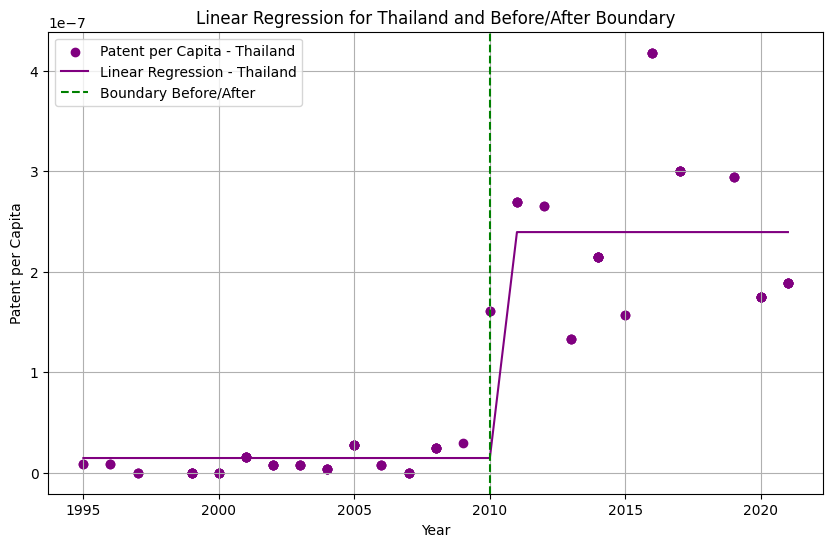

In [128]:
#Regression shift for Thailand
thailand_data = tha_mal[tha_mal['is Thailand'] == 1]

model_thailand = sm.OLS(thailand_data['Patent per Capita'],
                        sm.add_constant(thailand_data[['After Chock', 'After Chock Thailand']]))

results_thailand = model_thailand.fit()

predictions_thailand = results_thailand.predict()

plt.figure(figsize=(10, 6))

#Add point cloud and regression
plt.scatter(thailand_data['Year'], thailand_data['Patent per Capita'], label='Patent per Capita - Thailand', color='purple')
plt.plot(thailand_data['Year'], predictions_thailand, label='Linear Regression - Thailand', color='purple')

#put the shift line
plt.axvline(x=2010, color='green', linestyle='--', label='Boundary Before/After')

plt.xlabel('Year')
plt.ylabel('Patent per Capita')
plt.title('Linear Regression for Thailand and Before/After Boundary')
plt.legend()
plt.grid(True)
plt.show()

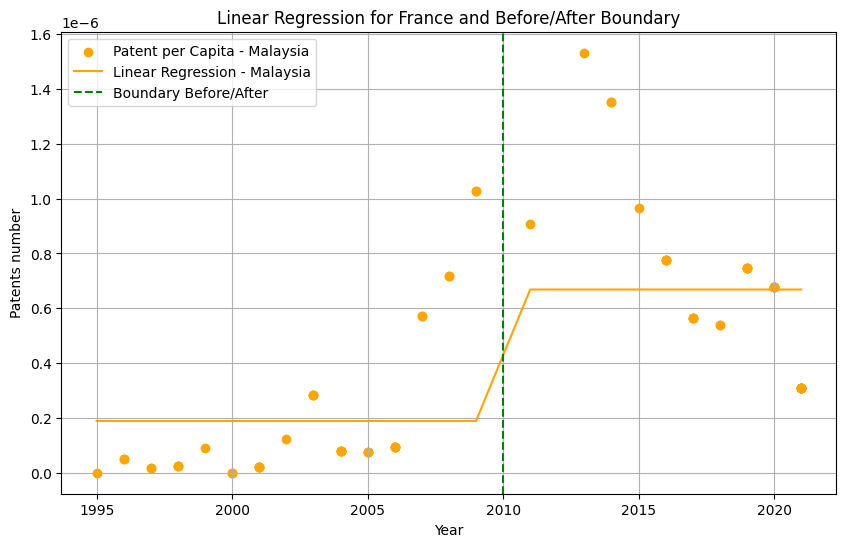

In [129]:
#regression for france
malaysia_data = tha_mal[tha_mal['is Thailand'] == 0]

model_malaysia = sm.OLS(malaysia_data['Patent per Capita'],
                        sm.add_constant(malaysia_data[['After Chock', 'After Chock Thailand']]))

results_malaysia = model_malaysia.fit()

predictions_malaysia = results_malaysia.predict()

plt.figure(figsize=(10, 6))

#Add point cloud and regression
plt.scatter(malaysia_data['Year'], malaysia_data['Patent per Capita'], label='Patent per Capita - Malaysia', color='orange')
plt.plot(malaysia_data['Year'], predictions_malaysia, label='Linear Regression - Malaysia', color='orange')

#put the shift line
plt.axvline(x=2010, color='green', linestyle='--', label='Boundary Before/After')

plt.xlabel('Year')
plt.ylabel('Patents number')
plt.title('Linear Regression for France and Before/After Boundary')
plt.legend()
plt.grid(True)
plt.show()

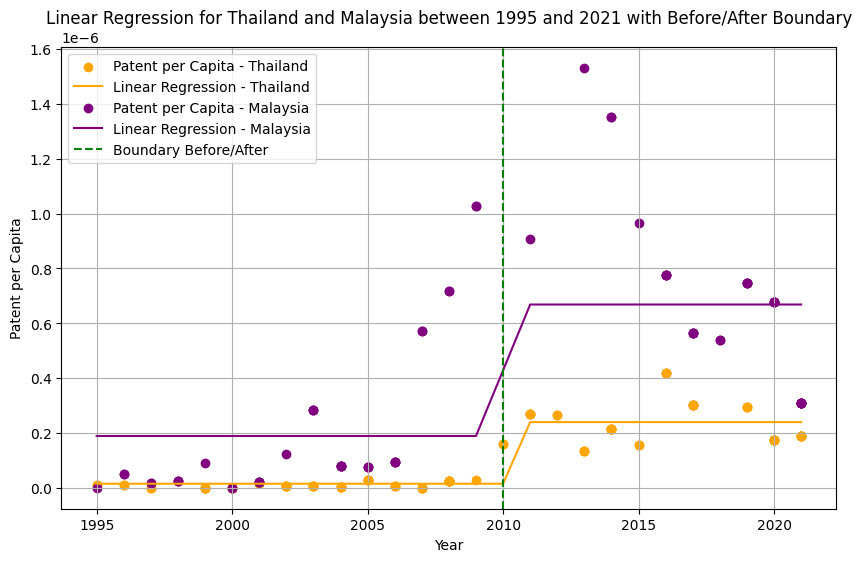

In [130]:
def difdiftha_mal():

  tha_mal = pd.read_csv('https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/tha_mal.csv')

  tha_mal['After Chock Thailand'] = tha_mal['is Thailand'] * tha_mal['After Chock']

  thailand_data = tha_mal[tha_mal['is Thailand'] == 1]

  model_thailand = sm.OLS(thailand_data['Patent per Capita'],
                          sm.add_constant(thailand_data[['After Chock', 'After Chock Thailand']]))

  results_thailand = model_thailand.fit()

  predictions_thailand = results_thailand.predict()

  malaysia_data = tha_mal[tha_mal['is Thailand'] == 0]

  model_malaysia = sm.OLS(malaysia_data['Patent per Capita'],
                          sm.add_constant(malaysia_data[['After Chock', 'After Chock Thailand']]))

  results_malaysia = model_malaysia.fit()

  predictions_malaysia = results_malaysia.predict()

  plt.figure(figsize=(10, 6))

#Sort data from 1990 to 2021
  thailand_data_filtered = thailand_data[(thailand_data['Year'] >= 1995) & (thailand_data['Year'] <= 2021)]
  predictions_thailand_filtered = predictions_thailand[(thailand_data['Year'] >= 1995) & (thailand_data['Year'] <= 2021)]

  malaysia_data_filtered = malaysia_data[(malaysia_data['Year'] >= 1995) & (malaysia_data['Year'] <= 2021)]
  predictions_malaysia_filtered = predictions_malaysia[(malaysia_data['Year'] >= 1995) & (malaysia_data['Year'] <= 2021)]

#regression for Brazil
  plt.scatter(thailand_data_filtered['Year'], thailand_data_filtered['Patent per Capita'], label='Patent per Capita - Thailand', color='orange')
  plt.plot(thailand_data_filtered['Year'], predictions_thailand_filtered, label='Linear Regression - Thailand', color='orange')

#regression for germany
  plt.scatter(malaysia_data_filtered['Year'], malaysia_data_filtered['Patent per Capita'], label='Patent per Capita - Malaysia', color='purple')
  plt.plot(malaysia_data_filtered['Year'], predictions_malaysia_filtered, label='Linear Regression - Malaysia', color='purple')

#shift line
  plt.axvline(x=2010, color='green', linestyle='--', label='Boundary Before/After')

  plt.xlabel('Year')
  plt.ylabel('Patent per Capita')
  plt.title('Linear Regression for Thailand and Malaysia between 1995 and 2021 with Before/After Boundary')
  plt.legend()
  plt.grid(True)
  plt.show()

difdiftha_mal()

In [131]:
#code theory
def graphe():
    x1 = np.linspace(0, 10, 100)
    y1 = 1.5 * x1 + 4

    x2 = np.linspace(0, 10, 100)
    y2 = x2 + 4

    x3 = np.linspace(0, 10, 100)
    y3 = x3 + 2

    plt.figure(figsize=(8, 6))
    plt.plot(x1, y1, color='orange', label='Treated group')
    plt.plot(x2, y2, linestyle='--', color='orange', label='Hypothetical treated group without treatment')
    plt.plot(x3, y3, color='green', label='Control group')

    plt.text(x1[0], y1[0], 'c', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x1[-1], y1[-1], 'd', fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x2[0], y2[0], '', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x2[-1], y2[-1], "d'", fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x3[0], y3[0], 'a', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x3[-1], y3[-1], 'b', fontsize=12, color='black', ha='right', va='bottom')

    plt.title('DID theoretical model')
    plt.xlabel('Time')
    plt.ylabel('Outcome')
    plt.legend()

    return plt.show()


In [147]:
# Adding fixed effects on country and time level
merged_final = merged_final.dropna()

can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept          753.99     21.888     34.447     0.0000      711.06      796.91
total_affected -2.517e-06  1.908e-06    -1.3192     0.1873  -6.258e-06   1.225e-06


In [148]:
# adding GDP as control
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -213.74     45.254    -4.7232     0.0000     -302.50     -124.99
total_affected -3.773e-06  1.674e-06    -2.2539     0.0243  -7.056e-06  -4.899e-07
GDP                0.0854     0.0036     23.614     0.0000      0.0783      0.0925


In [149]:
# adding FDI direct investment as control
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + FDI +  EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -292.74     41.166    -7.1111     0.0000     -373.47     -212.00
total_affected -2.261e-06  1.518e-06    -1.4897     0.1365  -5.238e-06   7.157e-07
GDP                0.0556     0.0036     15.494     0.0000      0.0486      0.0627
FDI             6.756e-09  3.345e-10     20.197     0.0000     6.1e-09   7.412e-09


In [150]:
# adding consumption as control
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + FDI + consumption + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -2103.6     318.89    -6.5968     0.0000     -2729.1     -1478.2
total_affected -2.618e-06  1.506e-06    -1.7378     0.0824  -5.572e-06   3.365e-07
GDP                0.0506     0.0037     13.789     0.0000      0.0434      0.0578
FDI             7.361e-09  3.481e-10     21.146     0.0000   6.679e-09   8.044e-09
consumption        25.292     4.4172     5.7259     0.0000      16.629      33.956


In [151]:
# adding population as control
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + FDI + consumption + Population + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -4466.3     452.56    -9.8690     0.0000     -5353.9     -3578.7
total_affected -1.944e-06  1.488e-06    -1.3057     0.1918  -4.863e-06   9.757e-07
GDP                0.0599     0.0038     15.605     0.0000      0.0524      0.0674
FDI             6.655e-09  3.569e-10     18.647     0.0000   5.955e-09   7.355e-09
consumption        41.143     4.8731     8.4429     0.0000      31.586      50.700
Population      2.669e-06  3.675e-07     7.2609     0.0000   1.948e-06   3.389e-06


In [152]:
# adding tertiary education enrolment rate as control (complete panel regression)
can = PanelOLS.from_formula("patents_number ~ 1 + total_damage + GDP + FDI + consumption + Population + Tertiary + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

AbsorbingEffectError: ignored

In [ ]:
def plot_1():
  avg_patents_by_year = merged_final.groupby('Year')['patents_number'].mean().reset_index().dropna()
  avg_damage_by_year = merged_final.groupby('Year')['total_affected'].mean().reset_index().dropna()
  plt.figure(figsize=(10, 6))
  plt.plot(avg_patents_by_year['Year'], np.log(avg_patents_by_year['patents_number']), linestyle='-', color='b', label='Yearly average number of patents')
  plt.plot(avg_damage_by_year['Year'], np.log(avg_damage_by_year['total_affected']), linestyle='-', color='r', label='Yearly Average number of people affected')

  plt.title('Average Patents Number and Average Number of Pople Affected Over Time')
  plt.xlabel('Year')
  plt.ylabel('log(Yearly Average)')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = merged_final[['total_affected', 'GDP', 'FDI', 'consumption', 'Population', 'Tertiary']]

# Handling missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Adding a constant for VIF calculation
X = add_constant(X)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying the VIF values
print("Variance Inflation Factors (VIF):")
print(vif_data)


## EDA

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


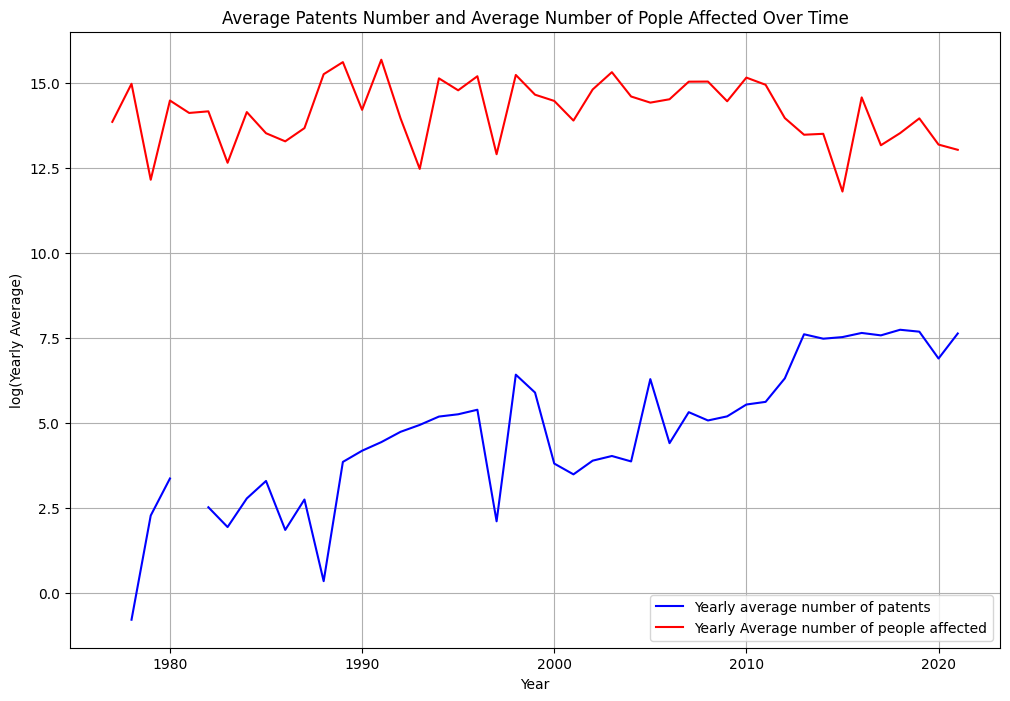

In [154]:
avg_patents_by_year = merged_final.groupby('Year')['patents_number'].mean().reset_index().dropna()
avg_damage_by_year = merged_final.groupby('Year')['total_affected'].mean().reset_index().dropna()
plt.figure(figsize=(12, 8))
plt.plot(avg_patents_by_year['Year'], np.log(avg_patents_by_year['patents_number']), linestyle='-', color='b', label='Yearly average number of patents')
plt.plot(avg_damage_by_year['Year'], np.log(avg_damage_by_year['total_affected']), linestyle='-', color='r', label='Yearly Average number of people affected')

plt.title('Average Patents Number and Average Number of Pople Affected Over Time')
plt.xlabel('Year')
plt.ylabel('log(Yearly Average)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-155-159b6d980f25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_final.corr()


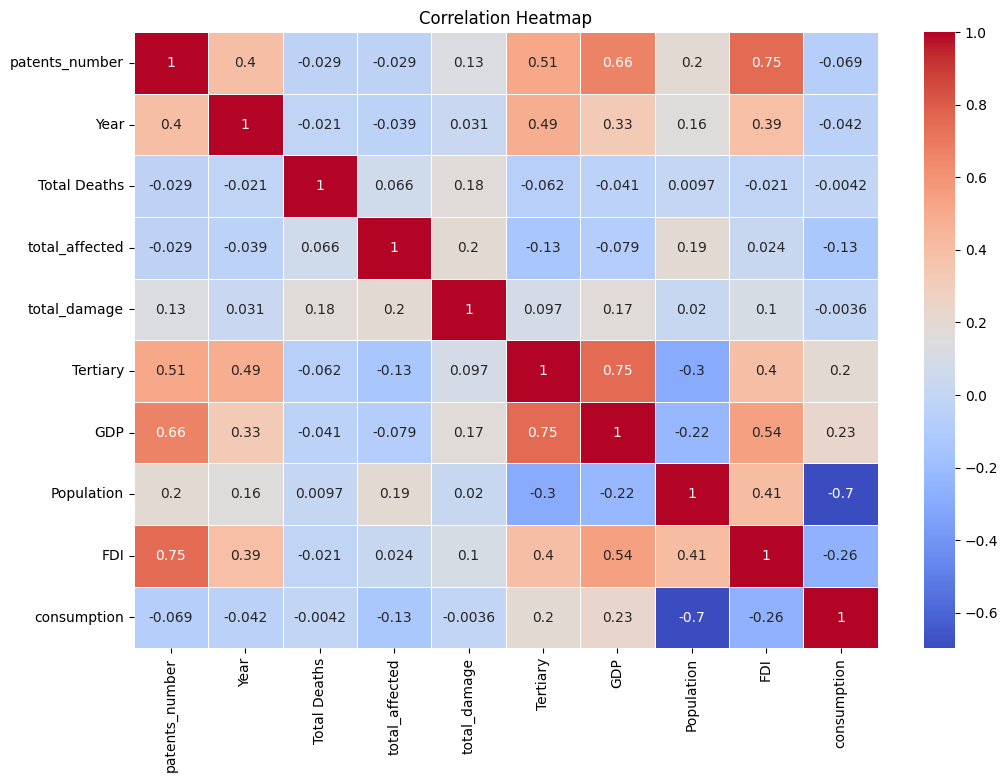

In [155]:
plt.figure(figsize=(12,8))
correlation_matrix = merged_final.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'Scatter Plot with Regression Line')

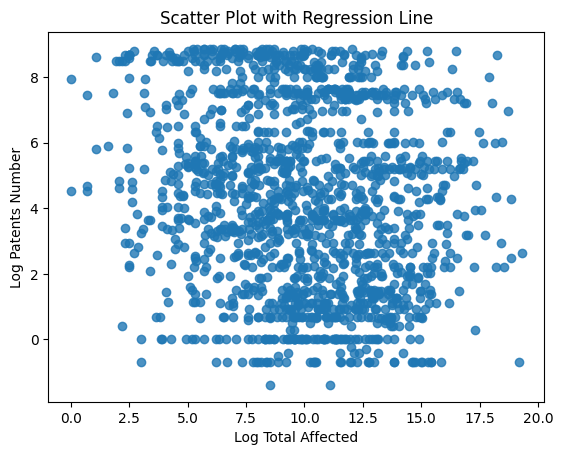

In [156]:
# Plot the scatterplot with a regression line after taking the logarithm
sns.regplot(x=np.log(merged_final['total_affected']), y=np.log(merged_final['patents_number']))

# Add labels, titles, or other plot customizations as needed
plt.ylabel("Log Patents Number")
plt.xlabel("Log Total Affected")
plt.title("Scatter Plot with Regression Line")

In [157]:
def graphe():
    x1 = np.linspace(0, 10, 100)
    y1 = 1.5 * x1 + 4

    x2 = np.linspace(0, 10, 100)
    y2 = x2 + 4

    x3 = np.linspace(0, 10, 100)
    y3 = x3 + 2

    plt.figure(figsize=(8, 6))
    plt.plot(x1, y1, color='orange', label='Tested group')
    plt.plot(x2, y2, linestyle='--', color='orange', label='Hypothetical tested group without treatment')
    plt.plot(x3, y3, color='green', label='Control group')

    plt.text(x1[0], y1[0], 'c', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x1[-1], y1[-1], 'd', fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x2[0], y2[0], '', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x2[-1], y2[-1], "d'", fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x3[0], y3[0], 'a', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x3[-1], y3[-1], 'b', fontsize=12, color='black', ha='right', va='bottom')

    plt.title('DID theoretical model')
    plt.xlabel('Time')
    plt.ylabel('Outcome')
    plt.legend()

    return plt.show()


## Merging dataframes - [OLD]

In [158]:
merged = pd.merge(patents_new,catastrophy, on=(['ISO','Year']), how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [159]:
merged = pd.merge(merged,gdp, on=(['ISO','Year']), how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [160]:
merged = pd.merge(merged, fdi, on=['ISO','Year'], how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [161]:
# merged = pd.merge(merged, reframed_government, on=['ISO','Year'], how='left')
# merged = merged.drop(columns='Country_y')
# merged = merged.rename(columns={'Country_x':'Country'})

NameError: ignored

In [ ]:
#merged = pd.merge(merged, climate_worriness, on=['ISO'], how='left')
#merged = merged.drop(columns='Country_y')
#merged = merged.rename(columns={'Country_x':'Country'})

In [162]:
merged = pd.merge(merged, education, on=['ISO','Year'], how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [165]:
merged = pd.merge(merged, pop, on=['ISO','Year'], how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [164]:
merged = merged.rename(columns={'Patents number': 'patents_number', 'Total Affected': 'total_affected', 'Total Damage, Adjusted (\'000 US$)':'total_damage'})
merged = merged.dropna(subset=['Disaster Type'])
merged = merged.dropna(thresh=6)
merged = merged[(merged['Year'] > 1971)]

In [166]:
def graphe():
    x1 = np.linspace(0, 10, 100)
    y1 = 1.5 * x1 + 4

    x2 = np.linspace(0, 10, 100)
    y2 = x2 + 4

    x3 = np.linspace(0, 10, 100)
    y3 = x3 + 2

    plt.figure(figsize=(8, 6))
    plt.plot(x1, y1, color='orange', label='Tested group')
    plt.plot(x2, y2, linestyle='--', color='orange', label='Hypothetical tested group without treatment')
    plt.plot(x3, y3, color='green', label='Control group')

    plt.text(x1[0], y1[0], 'c', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x1[-1], y1[-1], 'd', fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x2[0], y2[0], '', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x2[-1], y2[-1], "d'", fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x3[0], y3[0], 'a', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x3[-1], y3[-1], 'b', fontsize=12, color='black', ha='right', va='bottom')

    plt.title('DID theoretical model')
    plt.xlabel('Time')
    plt.ylabel('Outcome')
    plt.legend()

    return plt.show()


# Things not working



## secondary education

In [ ]:
# cleaning dataset with secondary education enrolment rate

second_edu

In [ ]:
second_edu = second_edu.drop(["Series Name", "Series Code"],axis=1)
second_edu['Country Name'] = second_edu["Country Name"].str.lower()

In [ ]:
second_edu.columns = second_edu.columns.str.replace(r'\s*\[YR[0-9]+\]\s*', '', regex=True)

In [ ]:
data = [['Country Name', 'Country Code', 'Year', 'Secondary']]

for index, row in second_edu.iterrows():
    country_name = row['Country Name']
    country_code = row['Country Code']
    for col in second_edu.columns[2:]:
        year = int(col)
        secondary = row[col]
        data.append([country_name, country_code, year, secondary])

# Create a new dataframe with data restructuring
second_edu = pd.DataFrame(data[1:], columns=data[0])
second_edu.reset_index(drop=True, inplace=True)


In [ ]:
second_edu  = second_edu.rename(columns={'Country Code':'ISO',"Country Name":'Country'})
second_edu['ISO'] = second_edu['ISO'].str.lower().astype('string')
second_edu['Secondary'] = second_edu['Secondary'].replace('..', pd.NA)

In [ ]:
second_edu = second_edu.dropna(subset='Secondary')

In [ ]:
second_edu.info()

## Back to merged not working

In [ ]:
merged['FDI_per_GDP'] = (merged['FDI'] / (merged['GDP'] * merged['Population'])) * 100

In [ ]:
merged_nona = merged.dropna(subset=['ISO', 'patents_number', 'Year', 'GDP', 'Value', 'Secondary', 'Population'])

In [ ]:
merged_nona

In [ ]:
merged

In [ ]:
catakeep = ['drought', 'flood', 'extreme temperature', 'storm', 'wildfire', 'glacial lake outburst flood'] # WHY?
merged_filtevn = merged_nona[merged_nona['Disaster Type'].isin(catakeep)]

In [ ]:
merged_filtevn

In [ ]:
merged_filtevn['patent_cap'] = merged_filtevn['patents_number'] / merged_filtevn['Population']

In [ ]:
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + FDI_per_GDP + Value + GDP + Population + EntityEffects + TimeEffects ",
                            data=merged.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

In [ ]:
# no controls nor FE
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + EntityEffects",
                            data=merged_.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]


In [ ]:
merged_filtevn.info()

In [ ]:
# no controls nor FE
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + Population  + EntityEffects + TimeEffects",
                            data=merged_filtevn.set_index(["ISO",'Year']))
result = can.fit()
result.summary.tables[1]


In [ ]:
# TOTAL DAMAGE
can = PanelOLS.from_formula("patents_number ~ 1 + total_damage + GDP + Population + EntityEffects + TimeEffects",
                            data=merged_filtevn.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]

In [ ]:
# no controls nor FE
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected",
                            data=merged_nona.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]


In [ ]:
#check with fixed effect
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + EntityEffects",
                            data=merged_nona.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]



In [ ]:
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + EntityEffects",
                            data=merged_nona.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]


In [ ]:
'''can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + + EntityEffects",
                            data=merged_nona.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]
'''

In [ ]:
# can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + Tertiary + EntityEffects", check_rank = False, drop_absorbed=True,
#                             data=merged_nona.set_index(["Country",'Year']))
# result = can.fit()
# result.summary.tables[1]